## 1.1 Titel
 Vergleich der Entwicklung wichtiger Todesursachen in Venezuela, Japan und Deutschland (1990–2016)

### 1.2 Fragestellung

Hauptfragestellung:
- Wie haben sich die Anteile der Todesfälle durch ausgewählte Krankheitsgruppen in Venezuela, Japan und Deutschland im Zeitraum 1990–2016 entwickelt?

Unterfragestellungen:
- Gibt es Unterschiede im Anteil der Todesfälle durch Infektions- und Parasitenkrankheiten zwischen Venezuela Japan und Deutschland?
- Wie unterscheiden sich die Anteile nichtübertragbarer Krankheiten (z.B. Verdauungs- und Atemwegserkrankungen) zwischen diesen drei Ländern?
- Lassen sich typische Muster eines „epidemiologischen Übergangs“ erkennen (Weg von Infektionskrankheiten hin zu chronischen Erkrankungen)?

### 1.3 Datenquelle

Die Daten stammen aus dem Datensatz
„Share of deaths from major causes“ von Our World in Data (https://ourworldindata.org),
basierend auf Mortalitätsstatistiken der WHO.

Es handelt sich um Sekundärdaten auf Länderebene.
Für jedes Land und Jahr werden prozentuale Anteile der Todesfälle
für verschiedene Ursachen angegeben.

### 1.4 Daten beschaffen und laden

In [18]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
from matplotlib import pyplot as plt

## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

In [3]:
# CSV einlesen (Datei muss im gleichen Ordner liegen)
df = pd.read_csv("share-of-deaths-from-major-causes.csv")

print("Erste Zeilen des Datensatzes:")
print(df.head())
print("\nForm des Datensatzes (Zeilen, Spalten):", df.shape)
print("\nDatentypen:")
print(df.dtypes)

print("\nAnzahl fehlender Werte pro Spalte:")
print(df.isna().sum())

# Kurzer Hinweis zu den Variablentypen (als Kommentar):
"""
- Entity: kategorial (Ländername)
- Code: kategorial (Ländercode, z.B. DEU, IND, VEN)
- Year: diskrete numerische Variable (Jahr)
- Alle „Share of total deaths...“-Spalten: kontinuierliche numerische Variablen (Anteile in Prozent)
"""

Erste Zeilen des Datensatzes:
    Entity Code  Year  \
0  Albania  ALB  1987   
1  Albania  ALB  1988   
2  Albania  ALB  1989   
3  Albania  ALB  1992   
4  Albania  ALB  1993   

   Share of total deaths in both sexes in those aged all ages that are from digestive diseases  \
0                                           3.884336                                             
1                                           3.716784                                             
2                                           3.682096                                             
3                                           3.364660                                             
4                                           3.551896                                             

   Share of total deaths in both sexes in those aged all ages that are from infectious and parasitic diseases  \
0                                           2.447189                                                            
1   

'\n- Entity: kategorial (Ländername)\n- Code: kategorial (Ländercode, z.B. DEU, IND, VEN)\n- Year: diskrete numerische Variable (Jahr)\n- Alle „Share of total deaths...“-Spalten: kontinuierliche numerische Variablen (Anteile in Prozent)\n'

# ...................................
# 2.1 Wichtige Spalten (Ursachen) automatisch finden und umbenennen
#     --> damit wir später einfache Namen wie "digestive", "infectious" usw. nutzen können
# ...................................

In [4]:
# ...................................
# 2.1 Wichtige Spalten (Ursachen) automatisch finden und umbenennen
#     --> damit wir später einfache Namen wie "digestive", "infectious" usw. nutzen können
# ...................................

cols = df.columns.tolist()
print("\nSpaltennamen (zur Kontrolle):")
for c in cols:
    print(c)

# Wir suchen die Spalten mit bestimmten Teil-Strings im Namen.
# So sind wir robust, auch wenn die Spaltennamen sehr lang sind.

digestive_col = [c for c in cols if "digestive diseases" in c][0]
infectious_col = [c for c in cols if "infectious and parasitic diseases" in c][0]
respiratory_col = [c for c in cols if "respiratory diseases" in c and "infections" not in c][0]

print("\nAutomatisch gefundene Spaltennamen für unsere Analyse:")
print("Digestive:", digestive_col)
print("Infectious:", infectious_col)
print("Respiratory:", respiratory_col)

# Jetzt benennen wir diese Spalten in kurze, gut lesbare Namen um
rename_dict = {
    digestive_col: "digestive",
    infectious_col: "infectious",
    respiratory_col: "respiratory"
}

df = df.rename(columns=rename_dict)

print("\nKontrolle nach dem Umbenennen (Auszug):")
print(df[["Entity", "Code", "Year", "digestive", "infectious", "respiratory"]].head())



Spaltennamen (zur Kontrolle):
Entity
Code
Year
Share of total deaths in both sexes in those aged all ages that are from digestive diseases
Share of total deaths in both sexes in those aged all ages that are from infectious and parasitic diseases
Share of total deaths in both sexes in those aged all ages that are from respiratory diseases
Share of total deaths in both sexes in those aged all ages that are from diabetes mellitus, blood and endocrine disorders
Share of total deaths in both sexes in those aged all ages that are from intentional injuries
Share of total deaths in both sexes in those aged all ages that are from perinatal conditions
Share of total deaths in both sexes in those aged all ages that are from respiratory infections
Share of total deaths in both sexes in those aged all ages that are from neuropsychiatric conditions
Share of total deaths in both sexes in those aged all ages that are from malignant neoplasms
Share of total deaths in both sexes in those aged all ages 

# ...................................
# 2.2 Zeitraum und Länder wählen
# ...................................

In [5]:
# ...................................
# 2.2 Zeitraum und Länder wählen
# ...................................

# Wir beschränken uns auf die Jahre ab 1990
df = df[df["Year"] >= 1990]

# Länder für Vergleich: Venezuela, Japan, Deutschland
countries_of_interest = ["Venezuela", "Japan", "Germany"]

df_sub = df[df["Entity"].isin(countries_of_interest)].copy()

print("\nGefilterter Datensatz (nur Venezuela, Japan, Deutschland ab 1990):")
print(df_sub.head())
print("\nForm des gefilterten Datensatzes:", df_sub.shape)
print("\nAnzahl Beobachtungen pro Land:")
print(df_sub["Entity"].value_counts())

"""

"""


Gefilterter Datensatz (nur Venezuela, Japan, Deutschland ab 1990):
       Entity Code  Year  digestive  infectious  respiratory  \
1705  Germany  DEU  1990   4.528322    0.835210     3.848629   
1706  Germany  DEU  1991   4.720245    0.827110     3.888856   
1707  Germany  DEU  1992   4.724979    0.856520     3.750891   
1708  Germany  DEU  1993   4.707947    0.891816     3.894480   
1709  Germany  DEU  1994   4.837785    0.951099     3.806317   

      Share of total deaths in both sexes in those aged all ages that are from diabetes mellitus, blood and endocrine disorders  \
1705                                           2.480126                                                                           
1706                                           2.503937                                                                           
1707                                           2.550136                                                                           
1708                   

'\n\n'

# ...................................
# 2.3 Long-Format erstellen (für flexible Plots)
# ...................................

In [6]:
# ...................................
# 2.3 Long-Format erstellen (für flexible Plots)
# ...................................

# Wir konzentrieren uns auf drei Ursachen:
cause_cols = ["digestive", "infectious", "respiratory"]

# melt -> von wide nach long
df_long = df_sub.melt(
    id_vars=["Entity", "Code", "Year"],
    value_vars=cause_cols,
    var_name="cause",
    value_name="share"
)

print("\nLong-Format (df_long) – erste Zeilen:")
print(df_long.head())
print("\nForm von df_long:", df_long.shape)

"""
Erklärung:
- Im Wide-Format haben wir eine Spalte pro Todesursache.
- Im Long-Format haben wir eine Spalte 'cause' (Name der Ursache)
  und eine Spalte 'share' (Anteil der Todesfälle).
- Das Long-Format ist oft einfacher für Plots und Gruppierungen.
"""


Long-Format (df_long) – erste Zeilen:
    Entity Code  Year      cause     share
0  Germany  DEU  1990  digestive  4.528322
1  Germany  DEU  1991  digestive  4.720245
2  Germany  DEU  1992  digestive  4.724979
3  Germany  DEU  1993  digestive  4.707947
4  Germany  DEU  1994  digestive  4.837785

Form von df_long: (267, 5)


"\nErklärung:\n- Im Wide-Format haben wir eine Spalte pro Todesursache.\n- Im Long-Format haben wir eine Spalte 'cause' (Name der Ursache)\n  und eine Spalte 'share' (Anteil der Todesfälle).\n- Das Long-Format ist oft einfacher für Plots und Gruppierungen.\n"

## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

# 3.1 Anzahl unterschiedlicher Jahre und Länder

In [7]:
# 3.1 Anzahl unterschiedlicher Jahre und Länder
print("\nUnterschiedliche Jahre im Datensatz:", sorted(df_sub["Year"].unique()))
print("Anzahl Jahre pro Land:")
print(df_sub.groupby("Entity")["Year"].nunique())


Unterschiedliche Jahre im Datensatz: [np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]
Anzahl Jahre pro Land:
Entity
Germany      31
Japan        33
Venezuela    25
Name: Year, dtype: int64


# 3.2 Fehlende Werte nur für die relevanten Ursachen

In [8]:
# 3.2 Fehlende Werte nur für die relevanten Ursachen
print("\nFehlende Werte in den betrachteten Ursachen-Spalten:")
print(df_sub[cause_cols].isna().sum())


Fehlende Werte in den betrachteten Ursachen-Spalten:
digestive      0
infectious     0
respiratory    0
dtype: int64


# 3.3 Deskriptive Statistik für die ausgewählten Ursachen

In [9]:
# 3.3 Deskriptive Statistik für die ausgewählten Ursachen
print("\nDeskriptive Statistik für die Ursachen (digestive, infectious, respiratory):")
print(df_sub[cause_cols].describe())

"""
Kommentar für den Bericht:
- Entity und Code sind kategorial.
- Year ist diskret (z.B. 1990, 1991, ...).
- 'digestive', 'infectious' und 'respiratory' sind kontinuierliche Variablen
  (Anteile in Prozent, nicht nur ganze Zahlen).
- Die deskriptive Statistik (min, max, Mittelwert, Quartile) zeigt, in welchem
  Bereich sich diese Anteile bewegen.
"""


Deskriptive Statistik für die Ursachen (digestive, infectious, respiratory):
       digestive  infectious  respiratory
count  89.000000   89.000000    89.000000
mean    4.286183    2.870109     4.426401
std     0.417024    1.999096     1.048274
min     3.721436    0.827110     2.960875
25%     3.917669    1.612457     3.618324
50%     4.197307    2.090232     4.088230
75%     4.618038    4.351569     4.930484
max     5.227676    9.710010     7.138332


"\nKommentar für den Bericht:\n- Entity und Code sind kategorial.\n- Year ist diskret (z.B. 1990, 1991, ...).\n- 'digestive', 'infectious' und 'respiratory' sind kontinuierliche Variablen\n  (Anteile in Prozent, nicht nur ganze Zahlen).\n- Die deskriptive Statistik (min, max, Mittelwert, Quartile) zeigt, in welchem\n  Bereich sich diese Anteile bewegen.\n"

# ...................................
# 3.4 Grafische Auswertung: Histogramme & Boxplot
# ...................................

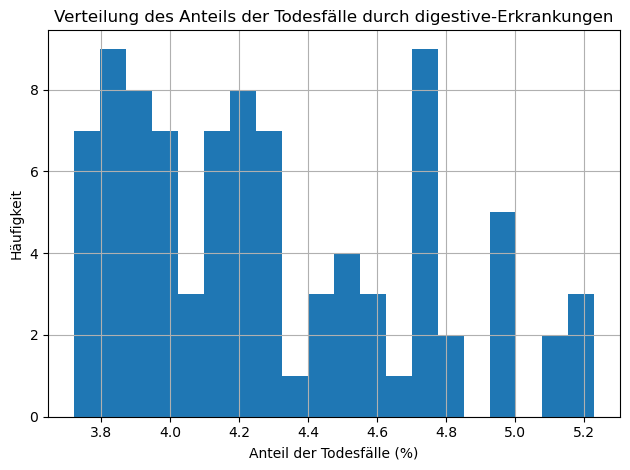

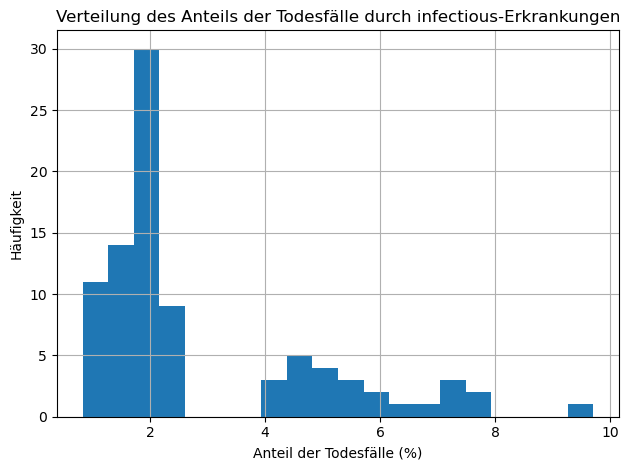

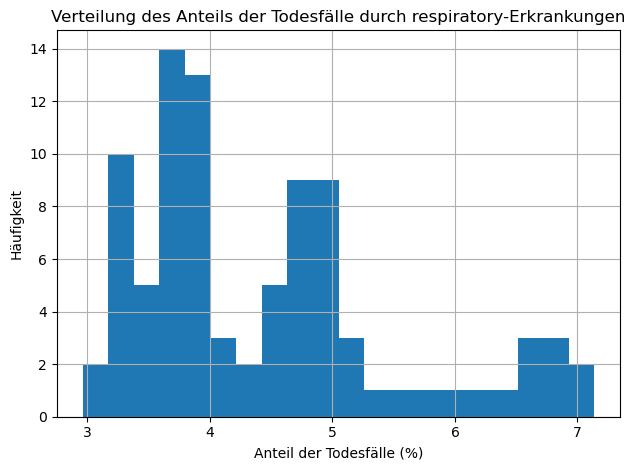

In [10]:
# Histogramm für jede Ursache
for cause in cause_cols:
    plt.figure()
    df_sub[cause].hist(bins=20)
    plt.title(f"Verteilung des Anteils der Todesfälle durch {cause}-Erkrankungen")
    plt.xlabel("Anteil der Todesfälle (%)")
    plt.ylabel("Häufigkeit")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

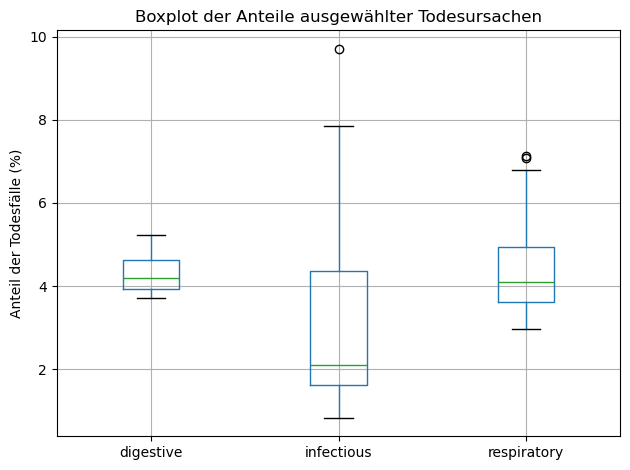

In [11]:
# Boxplot der drei Ursachen nebeneinander
plt.figure()
df_sub[cause_cols].boxplot()
plt.title("Boxplot der Anteile ausgewählter Todesursachen")
plt.ylabel("Anteil der Todesfälle (%)")
plt.tight_layout()
plt.show()


# ...................................
# 3.5 Zusammenhänge zwischen Variablen (Streudiagramm & Korrelation)
# ...................................

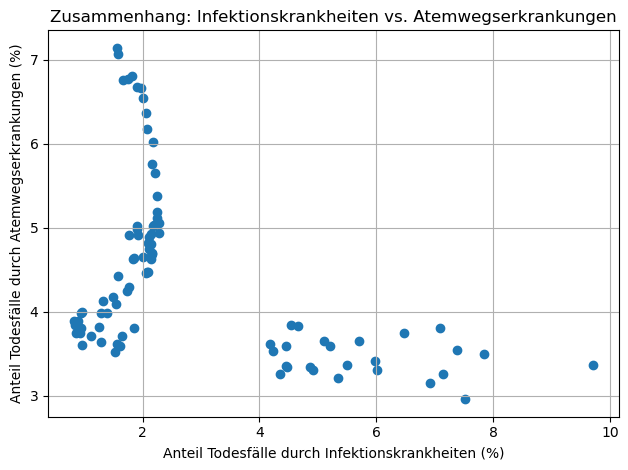

In [12]:
# Beispiel: Zusammenhang zwischen Infektions- und Atemwegserkrankungen
plt.figure()
plt.scatter(df_sub["infectious"], df_sub["respiratory"])
plt.title("Zusammenhang: Infektionskrankheiten vs. Atemwegserkrankungen")
plt.xlabel("Anteil Todesfälle durch Infektionskrankheiten (%)")
plt.ylabel("Anteil Todesfälle durch Atemwegserkrankungen (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
# Korrelationsmatrix für die drei Ursachen
corr_matrix = df_sub[cause_cols].corr()
print("\nKorrelationsmatrix (digestive, infectious, respiratory):")
print(corr_matrix)


Korrelationsmatrix (digestive, infectious, respiratory):
             digestive  infectious  respiratory
digestive     1.000000   -0.329248    -0.441838
infectious   -0.329248    1.000000    -0.458023
respiratory  -0.441838   -0.458023     1.000000


## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).



# 4.1 Zeitverlauf der Infektionskrankheiten (infectious) pro Land

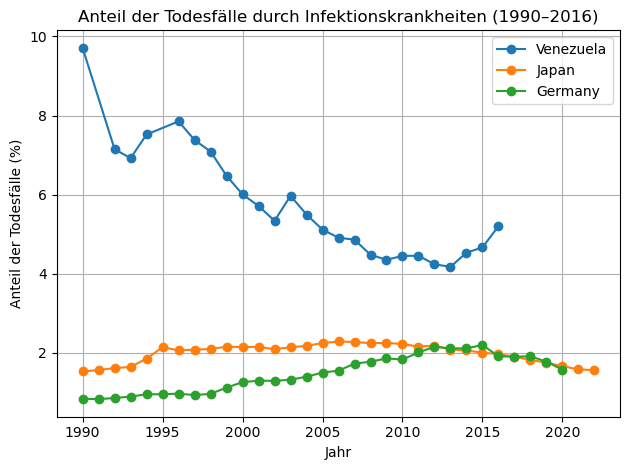

In [14]:
# 4.1 Zeitverlauf der Infektionskrankheiten (infectious) pro Land
plt.figure()
for country in countries_of_interest:
    subset = df_sub[df_sub["Entity"] == country].sort_values("Year")
    plt.plot(subset["Year"], subset["infectious"], marker="o", label=country)

plt.title("Anteil der Todesfälle durch Infektionskrankheiten (1990–2016)")
plt.xlabel("Jahr")
plt.ylabel("Anteil der Todesfälle (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 4.2 Zeitverlauf der Verdauungserkrankungen (digestive)

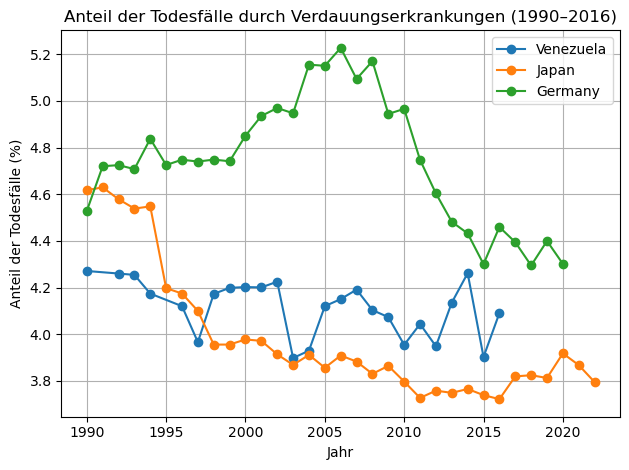

In [15]:
# 4.2 Zeitverlauf der Verdauungserkrankungen (digestive)
plt.figure()
for country in countries_of_interest:
    subset = df_sub[df_sub["Entity"] == country].sort_values("Year")
    plt.plot(subset["Year"], subset["digestive"], marker="o", label=country)

plt.title("Anteil der Todesfälle durch Verdauungserkrankungen (1990–2016)")
plt.xlabel("Jahr")
plt.ylabel("Anteil der Todesfälle (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 4.3 Zeitverlauf der Atemwegserkrankungen (respiratory)

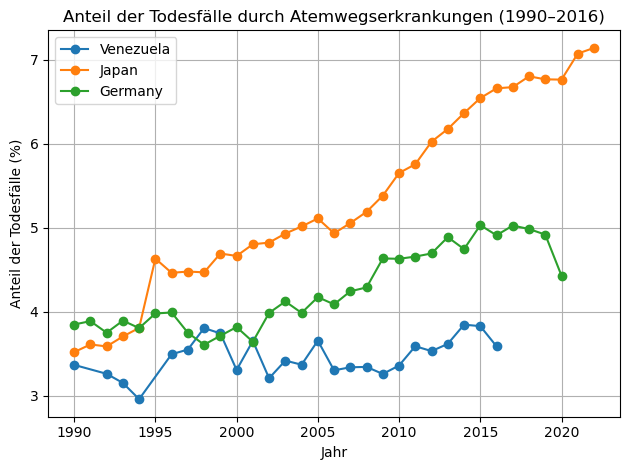

In [16]:
# 4.3 Zeitverlauf der Atemwegserkrankungen (respiratory)
plt.figure()
for country in countries_of_interest:
    subset = df_sub[df_sub["Entity"] == country].sort_values("Year")
    plt.plot(subset["Year"], subset["respiratory"], marker="o", label=country)

plt.title("Anteil der Todesfälle durch Atemwegserkrankungen (1990–2016)")
plt.xlabel("Jahr")
plt.ylabel("Anteil der Todesfälle (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Beobachtungen 

- Deutschland:
  Der Anteil der Todesfälle durch Infektions- und Parasitenkrankheiten ist im gesamten Zeitraum sehr niedrig und weitgehend stabil. Deutschland zeigt das typische Muster eines hochentwickelten Landes: Infektionskrankheiten spielen eine geringe Rolle, während nichtübertragbare Krankheiten dominieren.

- Japan:
  Japan weist – ähnlich wie Deutschland – sehr niedrige Anteile an Todesfällen durch Infektionskrankheiten auf. Auch hier stehen nichtübertragbare Erkrankungen wie Herz-Kreislauf-Leiden, Krebs und Stoffwechselkrankheiten im Vordergrund. Japan zählt zu den Ländern mit sehr hoher Lebenserwartung, was ebenfalls zeigt, dass chronische Krankheiten die Haupttodesursachen sind.
 Auffällig ist, dass Infektionskrankheiten bereits zu Beginn des Beobachtungszeitraums gering ausgeprägt sind, was auf ein früh entwickeltes Gesundheitssystem und hohe Hygienestandards hindeutet.

- Venezuela:
  Venezuela weist im Vergleich zu Deutschland höhere Anteile von Todesfällen
  durch Infektionskrankheiten auf. Politische und wirtschaftliche Instabilität
  kann dazu führen, dass Infektionskrankheiten relativ wichtig bleiben und
  die Versorgung nicht so stabil ist wie in hochentwickelten Ländern.

Interpretation:

 - Die Unterschiede zwischen Deutschland, Japan und Venezuela lassen sich gut mit dem Konzept des epidemiologischen Übergangs erklären.
 Mit zunehmender wirtschaftlicher Entwicklung und besserem Zugang zu medizinischer Versorgung gehen Infektionskrankheiten stark zurück, und nichtübertragbare Krankheiten (z. B. Herz-Kreislauf-Erkrankungen, Krebs, Diabetes, chronische Atemwegs- oder Verdauungserkrankungen) werden zur wichtigsten Todesursache.

 - Deutschland und Japan befinden sich klar in einem späten Stadium dieses Übergangs: niedrige Infektionsraten, hohe Lebenserwartung, Dominanz nichtübertragbarer Erkrankungen.
 Venezuela zeigt dagegen ein Mischbild, das durch politische Instabilität und wirtschaftliche Krisen beeinflusst wird, wodurch Infektionskrankheiten einen höheren Anteil behalten.

Fazit

 - Die Analyse der Todesursachen bestätigt die ursprüngliche Fragestellung:
 Es bestehen deutliche Unterschiede zwischen Venezuela, Japan und Deutschland.
 Deutschland und Japan haben Profile mit dominierenden nichtübertragbaren Erkrankungen und sehr niedrigen Anteilen von Infektionskrankheiten.
 Venezuela weist deutlich höhere Anteile von Infektionskrankheiten auf.

 Insgesamt zeigen die drei Länder verschiedene Stadien des epidemiologischen Übergangs. Damit lässt sich die Entwicklung der Todesursachen gut in einen grösseren gesundheitspolitischen und sozioökonomischen Kontext einordnen.